#### Activities-1 (based on exercise - 2.01 to 2.05)

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

Activities- Chapter 2.ipynb
Bar Chart.ipynb
Exercise-2 (2.01-2.17) -earthquake data.ipynb
dtypes.json
earthquake_data-Copy1.csv
house_prices-Copy1.csv
joins Analytics.ipynb


#### Read the data (house_prices.csv).

In [3]:
data = pd.read_csv('house_prices-Copy1.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Use pandas' .info() and .describe() methods to view the summary statistics of the dataset.The output of the info() method will be as follows:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [6]:
mask = pd.isnull(data)


In [7]:
total_count = mask.sum()

total_perc = 100 * mask.mean()

In [8]:
missing_val = pd.concat([total_count,total_perc], axis=1, keys=['total missing', 'perc missing'],join='outer' )

missing_val.sort_values(by='perc missing', ascending=False, inplace=True)

missing_val

,total missing,perc missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


#### Plot the nullity matrix and nullity correlation heatmap. The nullity matrix will be as follows:

In [9]:
nullable_columns = data.columns[data.isnull().any()].to_list()

In [10]:
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

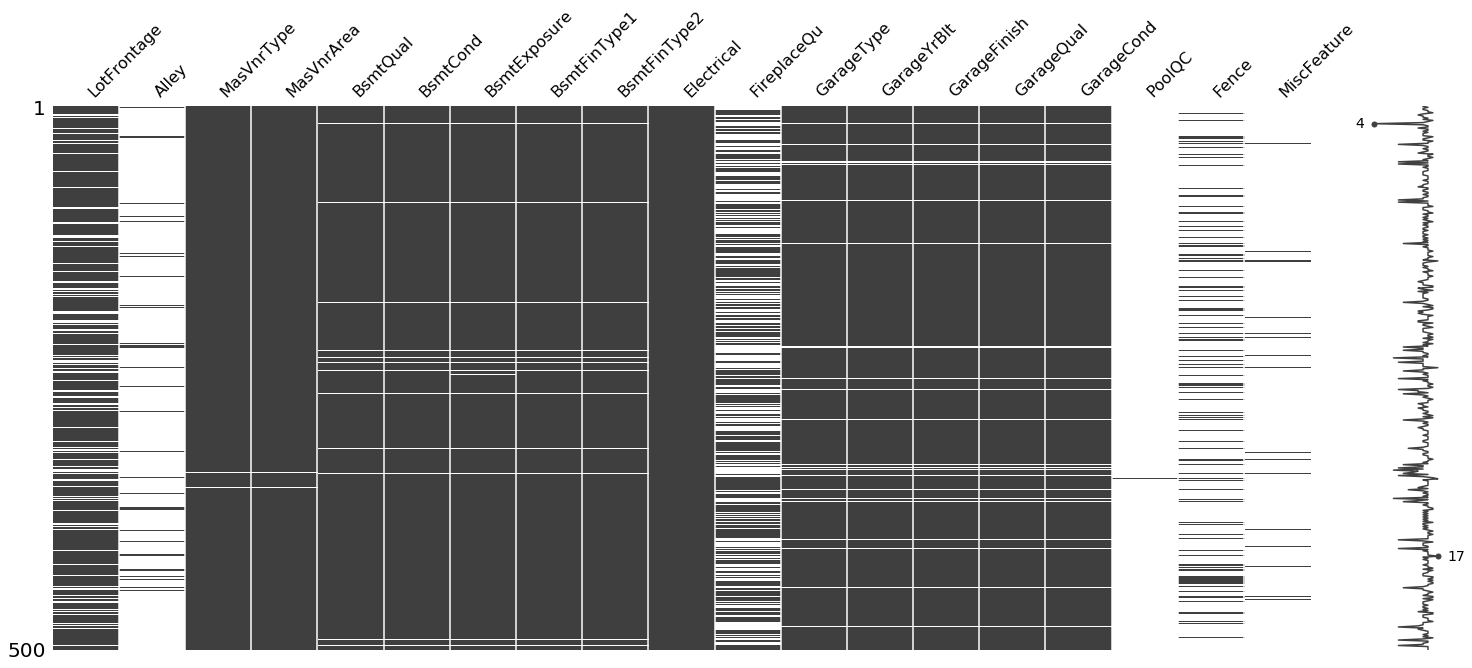

In [11]:
msno.matrix(data[nullable_columns].sample(500))

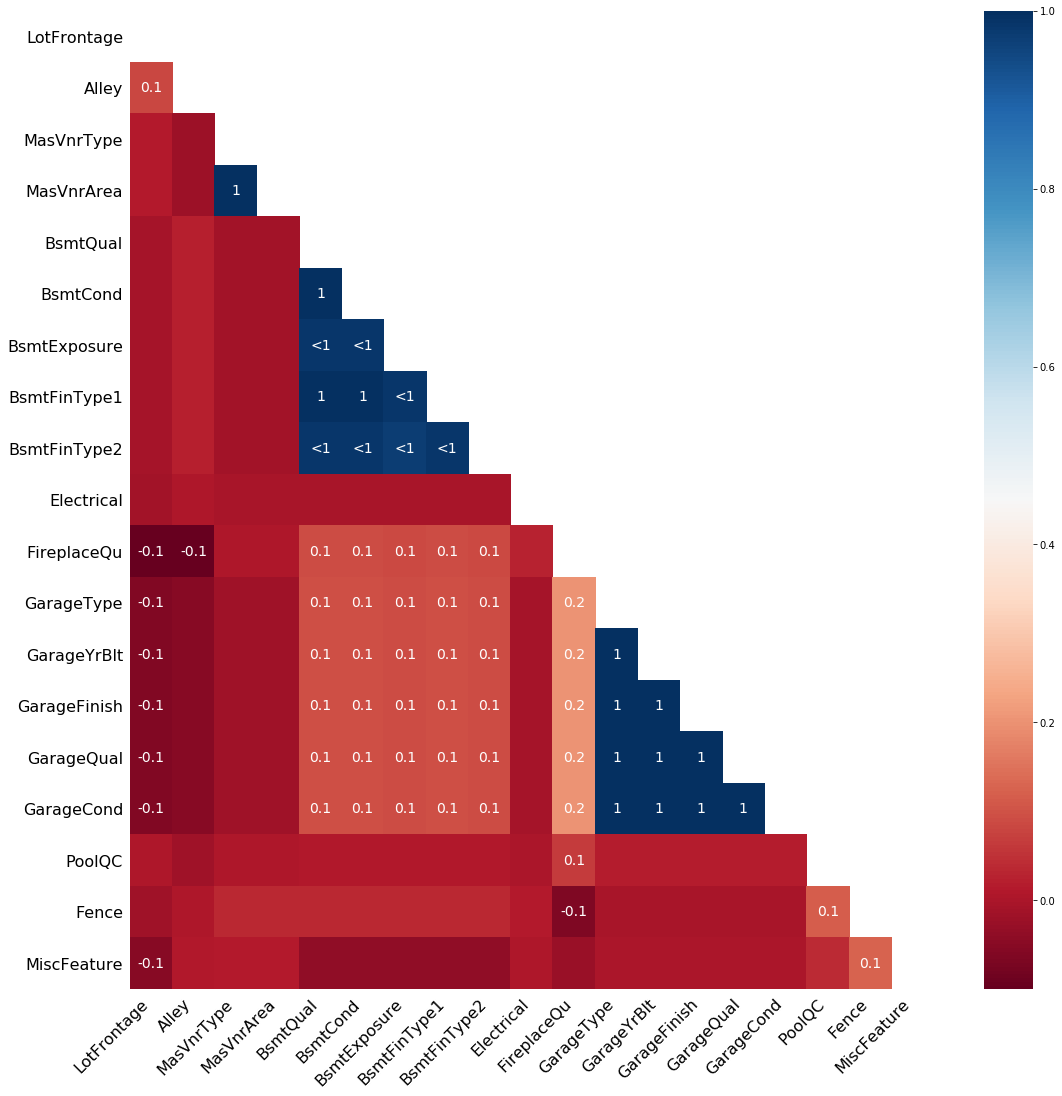

In [12]:
msno.heatmap(data[nullable_columns],figsize=(18,18),vmin=-.1)

#### Delete the columns having more than 80% of their values missing.

In [13]:
columns_to_drop= data.columns[missing_val['perc missing'].values >= 80]

data = data.drop(labels=columns_to_drop,axis=1)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   Street         1460 non-null   object 
 2   Alley          91 non-null     object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

#### Replace null values in the FireplaceQu column with NA values.

In [15]:
data.FireplaceQu

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [16]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')

In [17]:
data.FireplaceQu

0       NA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    NA
1459    NA
Name: FireplaceQu, Length: 1460, dtype: object

####  Activity - 2.02 (based on exercise 2.06 to 2.11)

Plot a histogram using Matplotlib for the target variable, SalePrice.

In [18]:
data.SalePrice.max()

755000

In [19]:
data.SalePrice.min()

34900

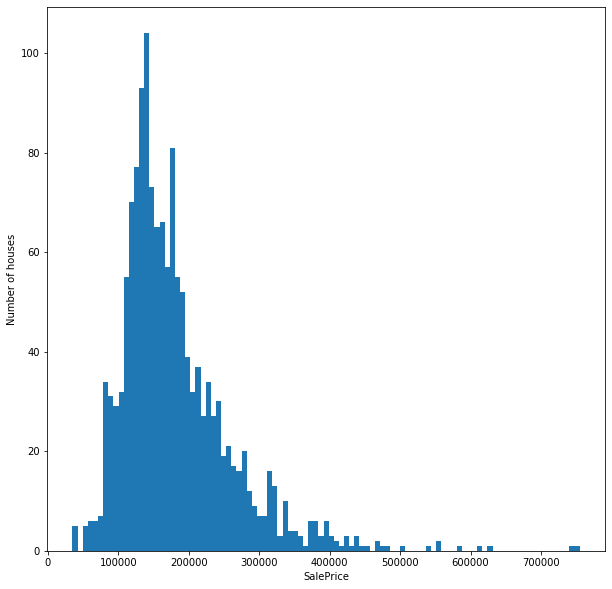

In [20]:
#1. initialize plot

plt.figure(figsize=(10,10))

#2. main plotting command

plt.hist(data.SalePrice.dropna(),bins = np.linspace(34900,755000,100))

#3.set display parameters and show plot
plt.xlabel('SalePrice')
plt.ylabel('Number of houses')
plt.show()

Find the number of unique values within each column having an object type.


In [21]:
count_ob = data.select_dtypes(include=[np.object])
count_ob.columns

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [22]:
unique_ob = count_ob.nunique().sort_values()
unique_ob

Street            2
Alley             2
Utilities         2
CentralAir        2
PoolQC            3
LandSlope         3
PavedDrive        3
GarageFinish      3
MiscFeature       4
Fence             4
KitchenQual       4
BsmtExposure      4
BsmtCond          4
ExterQual         4
MasVnrType        4
BsmtQual          4
LotShape          4
LandContour       4
Electrical        5
ExterCond         5
LotConfig         5
GarageCond        5
GarageQual        5
BldgType          5
HeatingQC         5
GarageType        6
FireplaceQu       6
SaleCondition     6
BsmtFinType2      6
BsmtFinType1      6
RoofStyle         6
Foundation        6
Heating           6
Functional        7
Condition2        8
HouseStyle        8
RoofMatl          8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

Create a DataFrame representing the number of occurrences for each categorical value in the HouseStyle column.


In [23]:
col_count = data.HouseStyle.value_counts(dropna=False)
col_count.reset_index().sort_values(by='index')

,index,HouseStyle
2,1.5Fin,154
5,1.5Unf,14
0,1Story,726
7,2.5Fin,8
6,2.5Unf,11
1,2Story,445
4,SFoyer,37
3,SLvl,65


Plot a pie chart representing these counts. The output will be as follows:






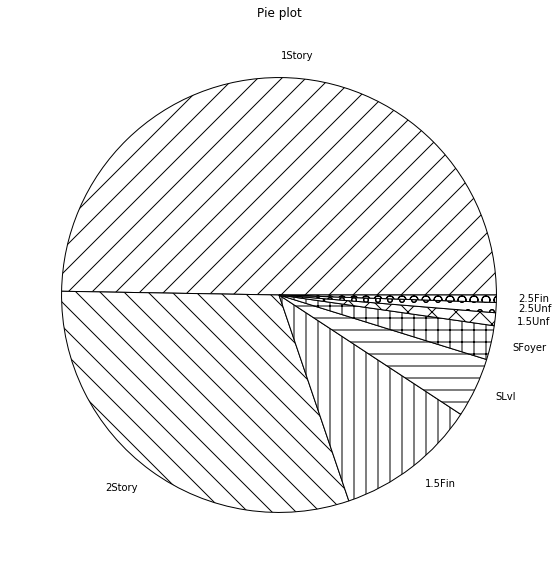

In [24]:
fig,ax = plt.subplots(figsize=(10,10))

slices = ax.pie(col_count, labels = col_count.index, colors = ['white'] ,wedgeprops = {'edgecolor': 'black'})

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '\.', '*']
patches = slices[0]

for patch in range(len(patches)):
    patches[patch].set_hatch(hatches[patch])
    
plt.title('Pie plot')
plt.show()

Find the number of unique values within each column having a number type.


In [25]:
numeric = data.select_dtypes(include=[np.number])
numeric.columns


Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
unique_num = numeric.nunique().sort_values(ascending=False)
unique_num

LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
OverallCond         9
BedroomAbvGr        8
PoolArea            8
GarageCars          5
YrSold              5
BsmtFullBath        4
FullBath            4
KitchenAbvGr        4
Fireplaces          4
BsmtHalfBath        3
HalfBath            3
dtype: int64

Plot a histogram using seaborn for the LotArea variable. The output will be as follows:


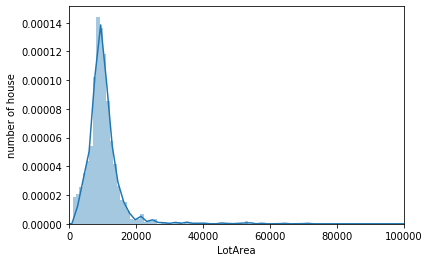

In [27]:
sns.distplot(data.LotArea.dropna(),bins=np.linspace(0,100000, 100) )
plt.xlabel('LotArea')
plt.ylabel('number of house')
plt.xlim(0,100000)
plt.show()

Calculate the skew and kurtosis values for the values in each column. The output for skew values will be:


In [28]:
data.skew().sort_values()

GarageYrBlt      -0.649415
YearBuilt        -0.613461
YearRemodAdd     -0.503562
GarageCars       -0.342549
FullBath          0.036562
YrSold            0.096269
GarageArea        0.179981
BedroomAbvGr      0.211790
MoSold            0.212053
OverallQual       0.216944
BsmtFullBath      0.596067
Fireplaces        0.649565
HalfBath          0.675897
TotRmsAbvGrd      0.676341
OverallCond       0.693067
2ndFlrSF          0.813030
BsmtUnfSF         0.920268
GrLivArea         1.366560
1stFlrSF          1.376757
TotalBsmtSF       1.524255
WoodDeckSF        1.541376
BsmtFinSF1        1.685503
SalePrice         1.882876
OpenPorchSF       2.364342
MasVnrArea        2.669084
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
MiscVal          24.476794
dtype: float64

In [29]:
data.kurt()

LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1.190601
SalePrice          6.536282
dtype: float64

#### Activity 2.03: Relationships within the Data



1. Plot the correlation heatmap for the dataset. The output should be similar to the following:

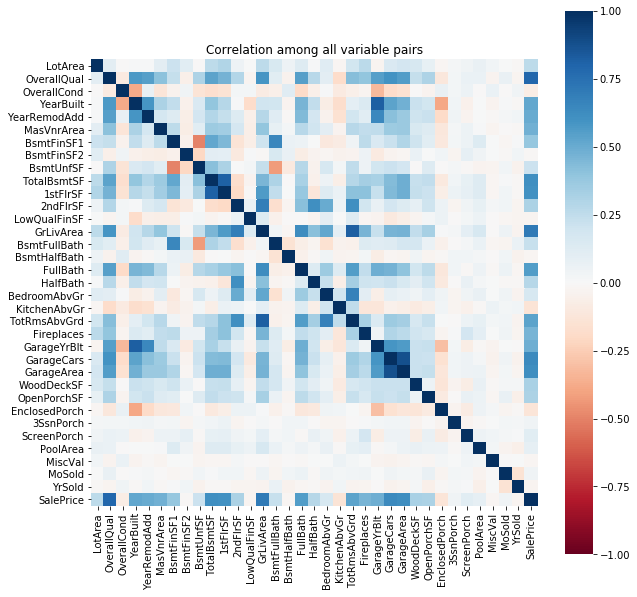

In [58]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), square=True, cmap='RdBu',vmax=1,vmin=-1)
plt.title('Correlation among all variable pairs')
plt.show()

2. Plot a more compact heatmap having annotations for correlation values using the following subset of features:

In [32]:
feature_subset = [
    'GarageArea', 'GarageCars','GarageCond','GarageFinish','GarageQual','GarageType',
    'GarageYrBlt','GrLivArea','LotArea','MasVnrArea','SalePrice'
]

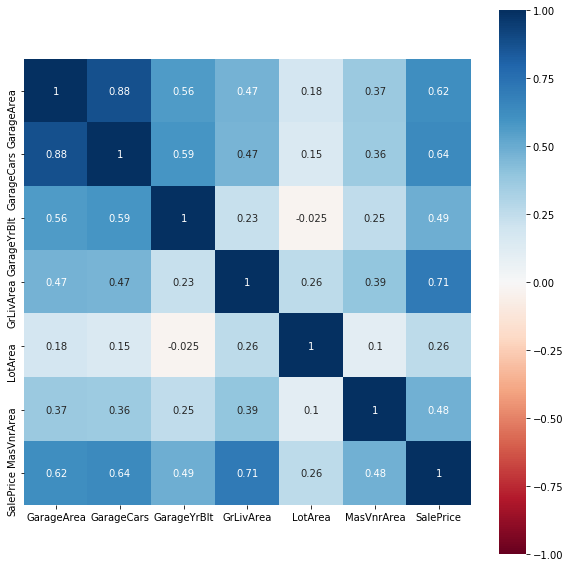

In [33]:
plt.figure(figsize=(10,10))

sns.heatmap(data[feature_subset].corr(), square=True, cmap = 'RdBu', vmax=1, vmin=-1, annot= True)
plt.title('Correlation plot among selected feature pairs')
plt.show()

3. Display the pairplot for the same subset of features, with the KDE plot on the diagonals and the scatter plot elsewhere. The output will be as follows:

<Figure size 720x720 with 0 Axes>

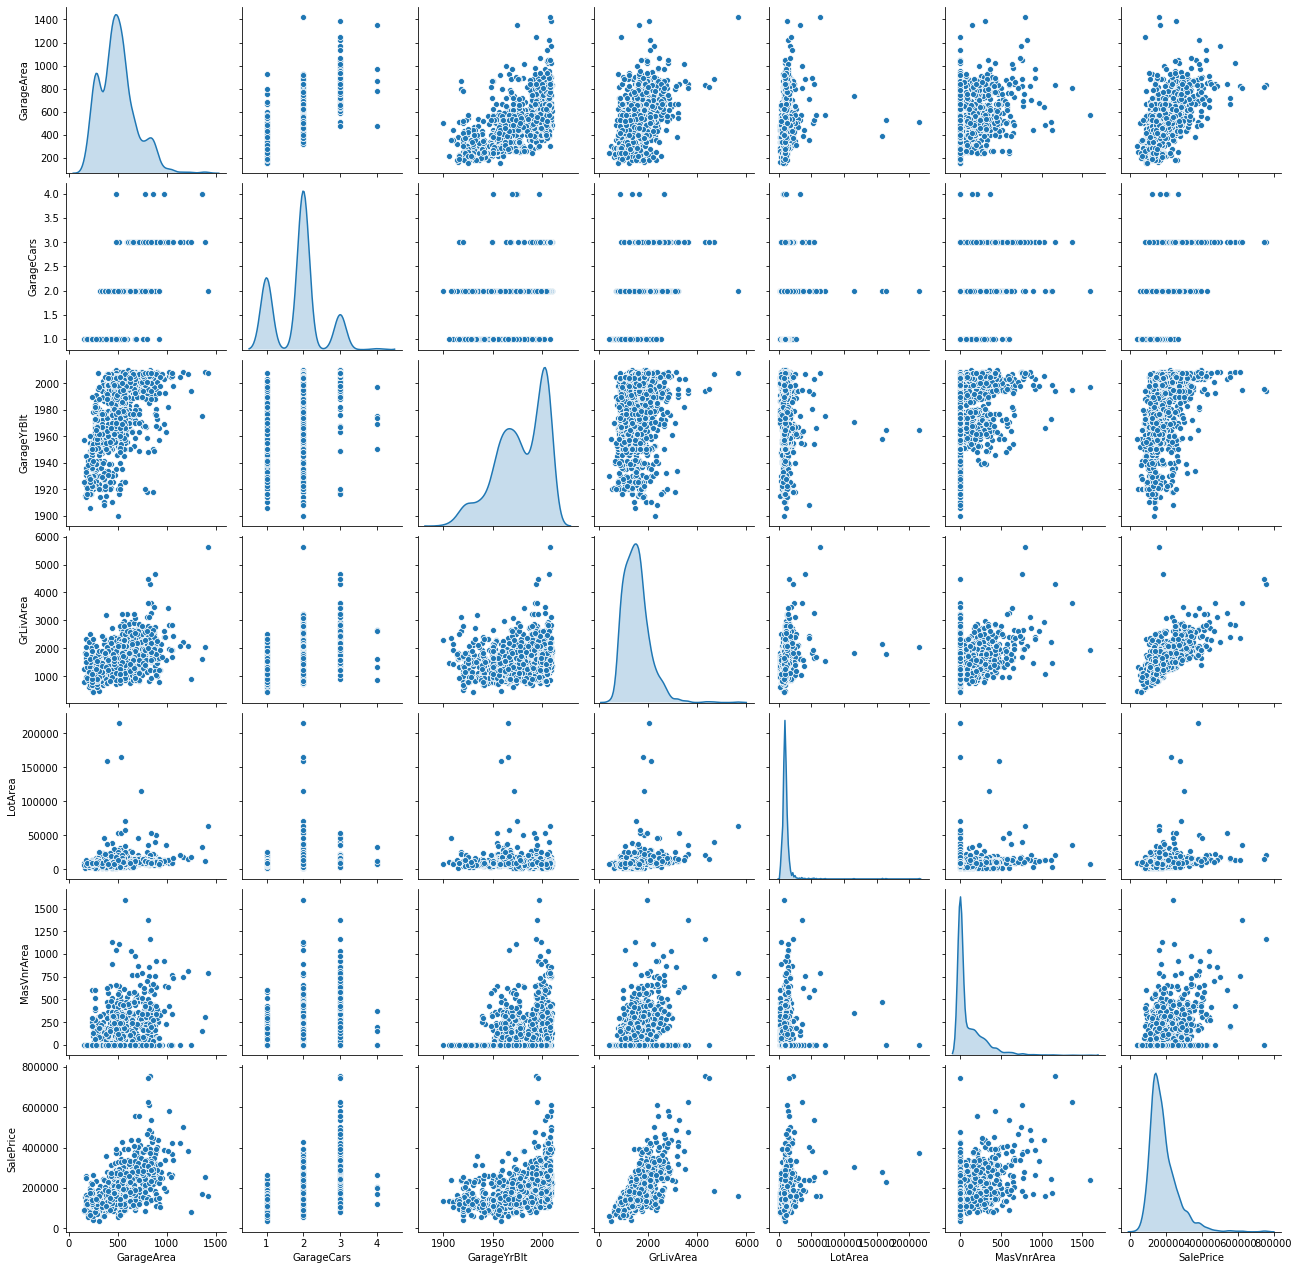

In [35]:
plt.figure(figsize=(10,10))

sns.pairplot(data[feature_subset].dropna(), kind= 'scatter', diag_kind='kde')

plt.show()

4. Create a boxplot to show the variation in SalePrice for each category of GarageCars:

In [38]:
data.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [44]:
order_index = data.GarageCars.value_counts().sort_index()
order_index

0     81
1    369
2    824
3    181
4      5
Name: GarageCars, dtype: int64

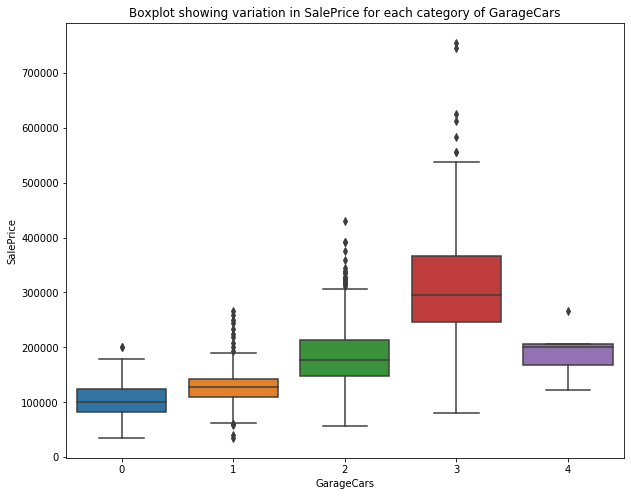

In [48]:
plt.figure(figsize=(10,8))

sns.boxplot(x='GarageCars', y='SalePrice', data=data, order= order_index.index )
plt.title('Boxplot showing variation in SalePrice for each category of GarageCars')
plt.show()

5. Plot a line graph using seaborn to show the variation in SalePrice for older and more recently built homes:

In [49]:
data.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [50]:
data.YearBuilt.nunique()

112

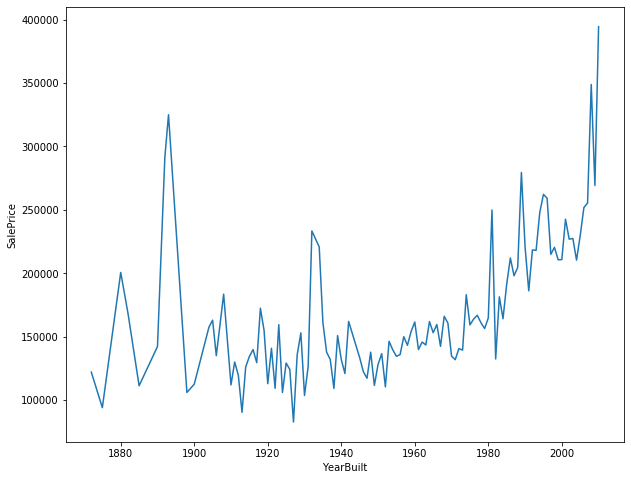

In [59]:
plt.figure(figsize=(10,8))

sns.lineplot(x=data.YearBuilt, y = data.SalePrice,ci=None  )

plt.show()